In [34]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.


import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.
from mpl_toolkits import mplot3d  # plotting 3d plots

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix  # creates a 
                                                                            # confusion matrix  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
from sklearn.impute import KNNImputer  # imputes missing values using KNN.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.linear_model import LinearRegression  # will use to replace missing values linear regressoin
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
from imblearn.over_sampling import RandomOverSampler  # Uses over sampling techniques to Sample the data correctly.
from imblearn.under_sampling import RandomUnderSampler # Uses Under sampling techniques to Sample the data correctly.
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score 
                                                                                 # Allows the usage of a classification report
from sklearn.metrics import precision_recall_fscore_support  # gives precison, recall, f1 score, and support
from sklearn.model_selection import RandomizedSearchCV  # performs randomized search cv


from collections import Counter  # Allows the counting the items in an iterable list.

import warnings  # allows to ignore warnings
warnings.filterwarnings("ignore")  # ignores warnings

#%matplotlib inline  # helps in showing plots on the browser.

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop('Id', 1)

In [4]:
df = df.set_axis(["sepal length", "sepal width", "petal length", "petal width", "Class"],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Function to evaluate different models

In [9]:
def Classifier_function(model, X_train, y_train,X_test,y_test, title):  # function takes the name of the 
                                                               # model used, the x and y traning and testing sets.
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.

  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and 
                                                                                       #  real results in a np array.
   

  train_accuracy = round(model.score(X_train,y_train),2) * 100  # Getting traing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100
  test_accuracy = round(model.score(X_test,y_test),2) * 100  # Getting testing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100

  print("Model train accuracy: ", train_accuracy, "%")  # printing the model accurcy. 
  print("Model test accuracy: ", test_accuracy, "%")  # printing the model accurcy. 


  print("\n\n")  # printing a new line.
  # getting Accuracy or recall or precision or specificity
  y_test_pred = model.predict(X_test)  # predicted results
  
  cReport = classification_report(y_test,y_test_pred)  # creating a Classification report
  print(cReport)  # creating a Classification report
  
  cm = confusion_matrix(y_test, y_test_p)  # creating the confusion matrix
  cm2 = multilabel_confusion_matrix(y_test, y_test_pred)  # creating a mutable confusion matrix


  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)  # getting the precision,
                                                                                          # recall and f1score for later use.
  accuracy  = round(np.trace(cm) / float(np.sum(cm)), 2) * 100  # getting aaccuracy and multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100.
  precision = round(np.mean(precision),2) * 100  # multipling precision variables mean by 100 after rounding it by
                                                #  2 to get a score between 0 to 100.
  recall = round(np.mean(recall),2) * 100  # multipling recall variables mean by 100 after rounding it by 2 to 
                                           # get a score between 0 to 100.
  f1_score = round(np.mean(f1_score),2) * 100  # multipling f1_score variables mean by 100 after rounding 
                                               # it by 2 to get a score between 0 to 100.

  lable_list = []  # creating a empty list

  for i in range(len(cm)):  # looping in the range of the length of the confusion matrix.
    for j in range(len(cm)):  # looping in the range of the length of the confusion matrix.
        if j == i:  # if the value of j is equal to the value of i.
            # the below code appends the Actual Values Classified correctly to the variable lable_list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) +"\n" + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

        else:   # otherwise
            #  the below function appends the actual values classified wrongly to the variable lable list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) + "\n"  + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

            
  lable_list = np.asarray(lable_list).reshape(len(cm),len(cm))  # resahping the label list as a numpy array to be 
                                                                # used in plotting the confusion matrix
  
  #  the variable function will be will be used to display the results of the evaluation to the confusion matrix.
  total_score = ("Accuracy:   " + str(accuracy) +" %" + "\nPrecison:    "  + str(precision)  +" %" + "\nRecall:        " +\
                 str(recall)  +" %" + "\nF1 score:    "  + str(f1_score) +" %") 


  # Below is the code used to plot the confusion matrix.
  plt.figure(figsize = (12,9))  # sets the size of the matrix
  disp = sns.heatmap(cm, annot=lable_list, fmt='', cmap='Blues')  # displays the results of the actual values 
                                                                 #  classified wrongly and correctly.                       
  disp.plot()  # displaying data in plot
  plt.title(title, fontsize=25)  # adding a title to plot
  plt.ylabel('True label', fontsize=20)  # adding a y axis to the plot.
  plt.xlabel('Predicted label' +"\n\nScores\n" +total_score, fontsize=20)  # adding a x axis to the plot
  plt.show()  # showing the plot
    
  result_list = train_accuracy,test_accuracy , precision, recall, f1_score  # returning the results

  

  return result_list  # returns the results from the model.

# Feature Scaling and testing function

In [10]:
def featurescaling(Scaler, X_train, X_test, y_train, y_test, Modelandprams ,Modelname):
    
    sucidedataframe.info()  # checking Basic information on the dataframe being procesed.
    
    sc = Scaler # creating an instance of the object.
    
    print("Before scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets before feature scaling.

    X_train[:, 55:] = sc.fit_transform(X_train[:, 55:])  # Scaling x_train
    X_test[:,55:] = sc.transform(X_test[:, 55:])  # Scaling y_train
    
    print("After scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets after feature scaling.
    print("\nThe result of the model")  
    Classifier_function(Modelandprams , X_train, y_train,X_test, y_test, Modelname)  
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Function to preform Grid Search

In [11]:
def Grid_search_fun(X, y):  # Function takes in X and y values hyperparameters.to perform grid search.

    # Grid Search
    max_depth_list =  [2, 3, 4, 5, 6, 8, 10, 11, 12]  # the depth the tree is allowed to grow.
    # used for regularization subsample, colsample_bylevel and colsample_bytree. If they are reduced more 
    # regularization effect can be achieved. Increasing them over fits the model.
    subsample_list = [0.1, 0.5, 0.25, 0.75, 0.99]  # how much percentage of data is taken.
    #colsample_bylevel_list = np.round(np.arange(0.1,1.0,0.01)) # by levels considring data percentages of features.
    colsample_bytree_list = [0.1, 0.5, 0.25, 0.75, 0.99]  # the fraction of columns to be randomly samples for each tree
    min_child_weight_list = [1,3,5,7] # stops trying to split once the sample size in a node goes 
                                                 # below a given threshold
    #  increasing  reg_alpha or reg_lambda regulizes the model or generilizes the model                           
    #reg_alpha_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # This is used to handle the regularization part of XGBoost.
    #reg_lambda_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # It can be used in case of very high dimensionality 
                                               # so that the algorithm runs faster when implemented.
    n_estimators_list =  [10,50,100,200] # gradiant booting algorythm each tree is bosting the next one.
    learning_rate_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # takes prcentage of residules and adds it back 
                                                # to the previous boosting tree.
                                 

    para_grid = dict(max_depth=max_depth_list, subsample=subsample_list,\
                   colsample_bytree=colsample_bytree_list, min_child_weight = min_child_weight_list, \
                    n_estimators = n_estimators_list,\
                   learning_rate = learning_rate_list )  # adding the above lists in a dictinary.





    model = XGBClassifier()  # creating an instance of the object.
    parameters = [para_grid]  # hyper parameters for the grid search
    grid_search = GridSearchCV(estimator = model,  # model
                           param_grid = parameters,  # hyper paramaters 
                           scoring = 'accuracy',  # score measurement
                           cv = 5, # number of cross validations 
                           n_jobs = -1, return_train_score=False)  # selecting all possible paramaters to go 
    # through to get the best model possible # train score is false as it can be computationaly expensive. without 
    # storing the traning score the grd search is fater
    grid_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(grid_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(grid_search.cv_results_)) # to print the whole result

    best_accuracy = grid_search.best_score_  # the best accuracy 
    best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters

# sub function to preform Random Search

In [12]:
def rand_search_fun(typeofmodelandprams, dict_prams,crossval, X, y):  # Function takes in the model type, number 
                                                             # of crossvalidation sand X and y values as hyperparameters.

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the random search 
    rand_search = RandomizedSearchCV(
                           model,
        #estimator = model,  # model
                           #param_distributions = parameters,  # hyper paramaters 
                           parameters,
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, # selecting all possible paramaters to go through to get the best model possible 
                           return_train_score=False, # train score is false as it can be computationaly expensive. 
                                                      # without storing the traning score the grd search is fater
                           n_iter=10,  # setting the number of iterations
                           random_state=5)  
    rand_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(rand_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(rand_search.cv_results_)) # to print the whole result

    best_accuracy = rand_search.best_score_  # the best accuracy 
    best_parameters = rand_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters



    return rand_search  # return random search value.

# Performs full Random Search on SVM model

In [22]:
def XGBoost_full_rand_search(X, y):  # performs randomized search

    # Random search 

    max_depth_list =  [2, 3, 4, 5, 6, 8, 10, 11, 12]  # the depth the tree is allowed to grow.
    min_child_weight_list = [1,3,5,7] # stops trying to split once the sample size in a node goes 
                                                 # below a given threshold
    # increasing  reg_alpha or reg_lambda regulizes the model or generilizes the model                           
    # reg_alpha_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # This is used to handle the regularization part of XGBoost.
    # reg_lambda_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # It can be used in case of very high dimensionality 
                                               # so that the algorithm runs faster when implemented.
    n_estimators_list =  [10,50,100,200] # gradiant booting algorythm each tree is bosting the next one.
    learning_rate_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # takes prcentage of residules and adds it back 
                                                # to the previous boosting tree.
                                 

    para_rand = dict(max_depth=max_depth_list,min_child_weight = min_child_weight_list, \
                    n_estimators = n_estimators_list,\
                   learning_rate = learning_rate_list )  # adding the above lists in a dictinary.


    rand_search = rand_search_fun(XGBClassifier(), para_rand, 5, X, y)  # Using the ranmomized search gunction with
    
    
    max_depth_list =  [2, 3, 4, 5, 6, 8, 10, 11, 12]  # the depth the tree is allowed to grow.
    # used for regularization subsample, colsample_bylevel and colsample_bytree. If they are reduced more 
    # regularization effect can be achieved. Increasing them over fits the model.
    subsample_list = [0.1, 0.5, 0.25, 0.75, 0.99]  # how much percentage of data is taken.
    # colsample_bylevel_list = np.round(np.arange(0.1,1.0,0.01)) # by levels considring data percentages of features.
    colsample_bytree_list = [0.1, 0.5, 0.25, 0.75, 0.99]
    # the fraction of columns to be randomly samples for each tree

                                 

    para_rand = dict(max_depth=max_depth_list, subsample=subsample_list, \
                   colsample_bytree=colsample_bytree_list)  # adding the above lists in a dictinary.


    rand_search = rand_search_fun(XGBClassifier(), para_rand, 5, X, y)  # Using the ranmomized search gunction with
    
    
    max_depth_list =  [2, 3, 4, 5, 6, 8, 10, 11, 12]  # the depth the tree is allowed to grow.
    # used for regularization subsample, colsample_bylevel and colsample_bytree. If they are reduced more 
    # regularization effect can be achieved. Increasing them over fits the model.
    subsample_list = [0.1, 0.5, 0.25, 0.75, 0.99]  # how much percentage of data is taken.
    # colsample_bylevel_list = np.round(np.arange(0.1,1.0,0.01)) # by levels considring data percentages of features.
    colsample_bytree_list = [0.1, 0.5, 0.25, 0.75, 0.99]
    # the fraction of columns to be randomly samples for each tree
    min_child_weight_list = [1,3,5,7] # stops trying to split once the sample size in a node goes 
                                                 # below a given threshold
    # increasing  reg_alpha or reg_lambda regulizes the model or generilizes the model                           
    # reg_alpha_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # This is used to handle the regularization part of XGBoost.
    # reg_lambda_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # It can be used in case of very high dimensionality 
                                               # so that the algorithm runs faster when implemented.
    n_estimators_list =  [10,50,100,200] # gradiant booting algorythm each tree is bosting the next one.
    learning_rate_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # takes prcentage of residules and adds it back 
                                                # to the previous boosting tree.
                                 

    para_rand = dict(max_depth=max_depth_list, subsample=subsample_list, \
                   colsample_bytree=colsample_bytree_list, min_child_weight = min_child_weight_list, \
                    n_estimators = n_estimators_list,\
                   learning_rate = learning_rate_list )  # adding the above lists in a dictinary.


    rand_search = rand_search_fun(XGBClassifier(), para_rand, 5, X, y)  # Using the ranmomized search gunction with

## k-fold cross-validation Graph

In [44]:
def xgboost_subplot(list_for_plot, ave_scores, hyper_pram_to_use_name):
    
    print("ave " + hyper_pram_to_use_name + " scores", ave_scores)  # printing the average score of the model
    
    plt.figure()
    plt.title("Best " + hyper_pram_to_use_name + " Selection",fontsize=18)  # Displays plot title
    plt.plot(list_for_plot, ave_scores)  # Displays description of the plots x and y labels.
    plt.xlabel(hyper_pram_to_use_name +" values")  # Displays the x axis for the plot
    plt.ylabel("Average CV model accuracy")  # Displays the y axis for the plot
    plt.legend([hyper_pram_to_use_name], loc="lower right")  # adds a legend to the plot.
    plt.grid()  # adds a gird to the plot
    

In [49]:
def xgboost_plot_Values(X,y):  # Values required for plotting
    
    learning_rate_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # takes prcentage of residules and adds it back 
                                               # to the previous boosting tree.
    ave_scores = []  # Creating a empty list
    max_depth_list =  [2, 3, 4, 5, 6, 8, 10, 11, 12]  # the depth the tree is allowed to grow.
    # used for regularization subsample, colsample_bylevel and colsample_bytree. If they are reduced more 
    # regularization effect can be achieved. Increasing them over fits the model.
    for l in max_depth_list:  # looping through each value in the list variable
        model =  XGBClassifier(max_depth=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.
    xgboost_subplot(max_depth_list, ave_scores ,"max_depth")
    

    ave_scores = []  # Creating a empty list
    subsample_list = [0.1, 0.5, 0.25, 0.75, 0.99]  # how much percentage of data is taken.
    # colsample_bylevel_list = np.round(np.arange(0.1,1.0,0.01)) # by levels considring data percentages of features.
    for l in subsample_list:  # looping through each value in the list variable
        model =  XGBClassifier(subsample=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.
    xgboost_subplot(subsample_list, ave_scores, "subsample")
    
    

    ave_scores = []  # Creating a empty list
    colsample_bytree_list = [0.1, 0.5, 0.25, 0.75, 0.99]   # the fraction of columns to be randomly samples for each tree
    # colsample_bylevel_list = np.round(np.arange(0.1,1.0,0.01)) # by levels considring data percentages of features.
    for l in colsample_bytree_list:  # looping through each value in the list variable
        model =  XGBClassifier(colsample_bytree=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.
    xgboost_subplot(colsample_bytree_list, ave_scores, "colsample")
    
    
    
    
    ave_scores = []  # Creating a empty list   
    min_child_weight_list = [1,3,5,7] # stops trying to split once the sample size in a node goes 
                                      # below a given threshold
    for l in min_child_weight_list:  # looping through each value in the list variable
        model =  XGBClassifier(min_child_weight=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.   
    xgboost_subplot(min_child_weight_list, ave_scores, "min_child_weight")
    
    

    
    ave_scores = []  # Creating a empty list   
    n_estimators_list =  [10,50,100,200] # gradiant booting algorythm each tree is bosting the next one.
    for l in min_child_weight_list:  # looping through each value in the list variable
        model =  XGBClassifier(n_estimators=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.   
    xgboost_subplot(n_estimators_list, ave_scores, "n_estimators_list")
    
    
    
    ave_scores = []  # Creating a empty list   
    learning_rate_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # takes prcentage of residules and adds it back 
                                                            # to the previous boosting tree.
    for l in learning_rate_list:  # looping through each value in the list variable
        model =  XGBClassifier(learning_rate=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.       
    
    xgboost_subplot(learning_rate_list, ave_scores, "learning_rate")
    
    
    

    ave_scores = []  # Creating a empty list   
    reg_alpha_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # This is used to handle the regularization part of XGBoost.
    for l in reg_alpha_list:  # looping through each value in the list variable
        model =  XGBClassifier(reg_alpha=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.       
    
    xgboost_subplot(reg_alpha_list, ave_scores, "reg_alpha")    
    

    
    ave_scores = []  # Creating a empty list   
    reg_lambda_list = [0, 0.001, 0.005, 0.01, 0.05, 1]  # It can be used in case of very high dimensionality 
                                               # so that the algorithm runs faster when implemented.
    for l in reg_lambda_list:  # looping through each value in the list variable
        model =  XGBClassifier(reg_lambda=l)  # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.       
    
    xgboost_subplot(reg_lambda_list, ave_scores, "reg_lambda")    


## k-fold cross-validation

In [15]:
def crossvalscore(model, X, y, cv_val):  # function to perform cross validation with model X, y and cv_val as parameters
    score = cross_val_score(estimator = model, X = X, y = y, cv = cv_val)   # performs different tests to get best accurecy.
    print("Accuracy: {:.2f} %".format(score.mean()*100))  # accuracy printed.
    print("Standard Deviation: {:.2f} %".format(score.std()*100))  # standard deveation printed (std -avarage or std+ avarage )
    return ("Accuracy: {:.2f} %".format(score.mean()*100))  # Accuracy is returned.

# X and y un_edited

## Plotting the SVM with a average Cross-val score

ave max_depth scores [0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]
ave subsample scores [0.92, 0.96, 0.96, 0.96, 0.96]
ave colsample scores [0.96, 0.96, 0.96, 0.96, 0.96]
ave min_child_weight scores [0.96, 0.947, 0.953, 0.947]
ave n_estimators_list scores [0.953, 0.967, 0.953, 0.953]
ave learning_rate scores [0.96, 0.96, 0.96, 0.96, 0.96, 0.96]
ave reg_alpha scores [0.96, 0.96, 0.96, 0.96, 0.96, 0.967]
ave reg_lambda scores [0.96, 0.96, 0.96, 0.96, 0.96, 0.96]


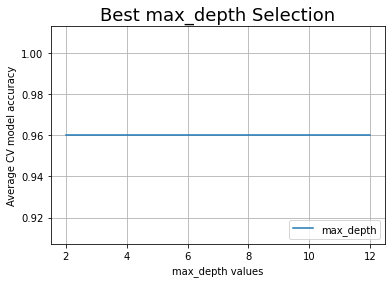

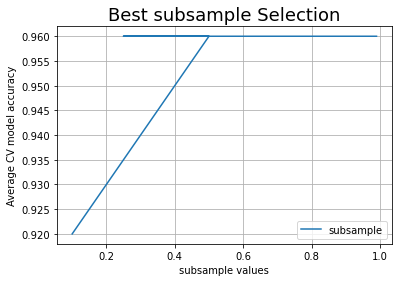

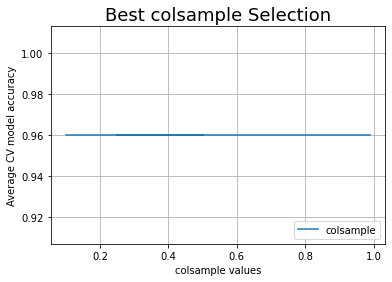

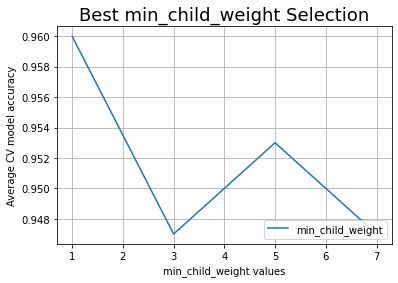

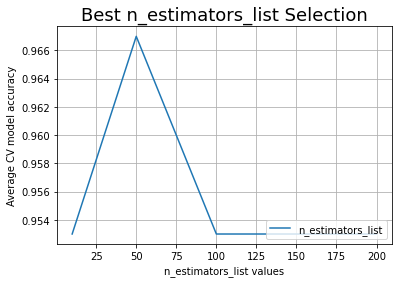

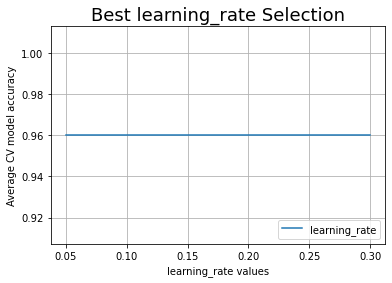

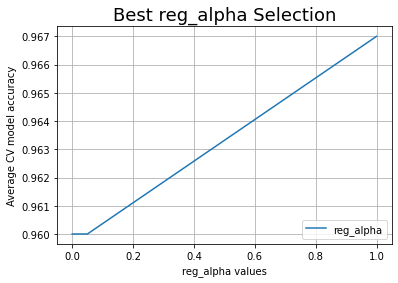

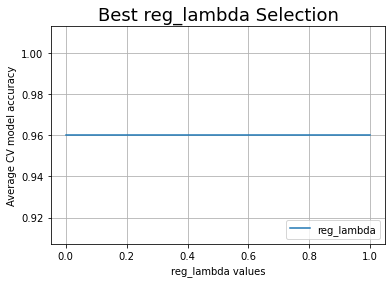

In [52]:
xgboost_plot_Values(X,y)  # PLots KNN Cross Val score

## Cross Validation

In [51]:
crossvalscore(XGBClassifier(verbosity = 0), X, y, 5)  # Performs cross validation.

Accuracy: 96.00 %
Standard Deviation: 2.49 %


'Accuracy: 96.00 %'

## Grid Search

In [ ]:
Grid_search_fun(X, y)  # performs grid search.

## Random search 

In [23]:
XGBoost_full_rand_search(X, y)  # performs random search.

[16:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.511044      0.104441         0.010585        0.008920   
1       0.434654      0.029708         0.009373        0.007653   
2       0.292860      0.011584         0.012497        0.006249   
3       0.062501      0.009885         0.009375        0.007655   
4       0.193753      0.021198         0.018746        0.006248   
5       0.259375      0.018750         0.015627        0.009881   
6       0.300001      0.015310         0.009376        0.007656   
7       0.050000      0.006248         0.012498        0.006249   
8       0.125001      0.009880         0.012498        0.006249   
9       0.221879   

[16:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.346491      0.035353         0.020327        0.005376   
1       0.439769      0.017832         0.011775        0.006053   
2       0.049098      0.004781         0.008935        0.005077   
3       0.171105      0.023155         0.006325        0.005867   
4       0.067312      0.017112         0.009325        0.005183   
5       0.256985      0.015435         0.011939        0.002256   
6       0.047001      0.007025         0.011926        0.002151   
7       0.054534      0.006993         0.009395        0.007671   
8       0.059337      0.015292         0.025010        0.007642   
9       0.438159   

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(XGBClassifier(), X_train, y_train,X_test, y_test, "XGBoost")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, `X_test, y_train, y_test,\
               XGBClassifier() ,"XGBoost")
# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test,\
               XGBClassifier() ,"XGBoost")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,\
               XGBClassifier() ,"XGBoost")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test,\
               XGBClassifier() ,"XGBoost")

# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score